In [59]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
from sqlalchemy import create_engine
import warnings
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn import datasets

In [60]:
# Loading the data from scikit-learn's datasets
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Standardizing the features
scaler = StandardScaler()
X_std = scaler.fit_transform(X)


24.1 ms ± 518 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


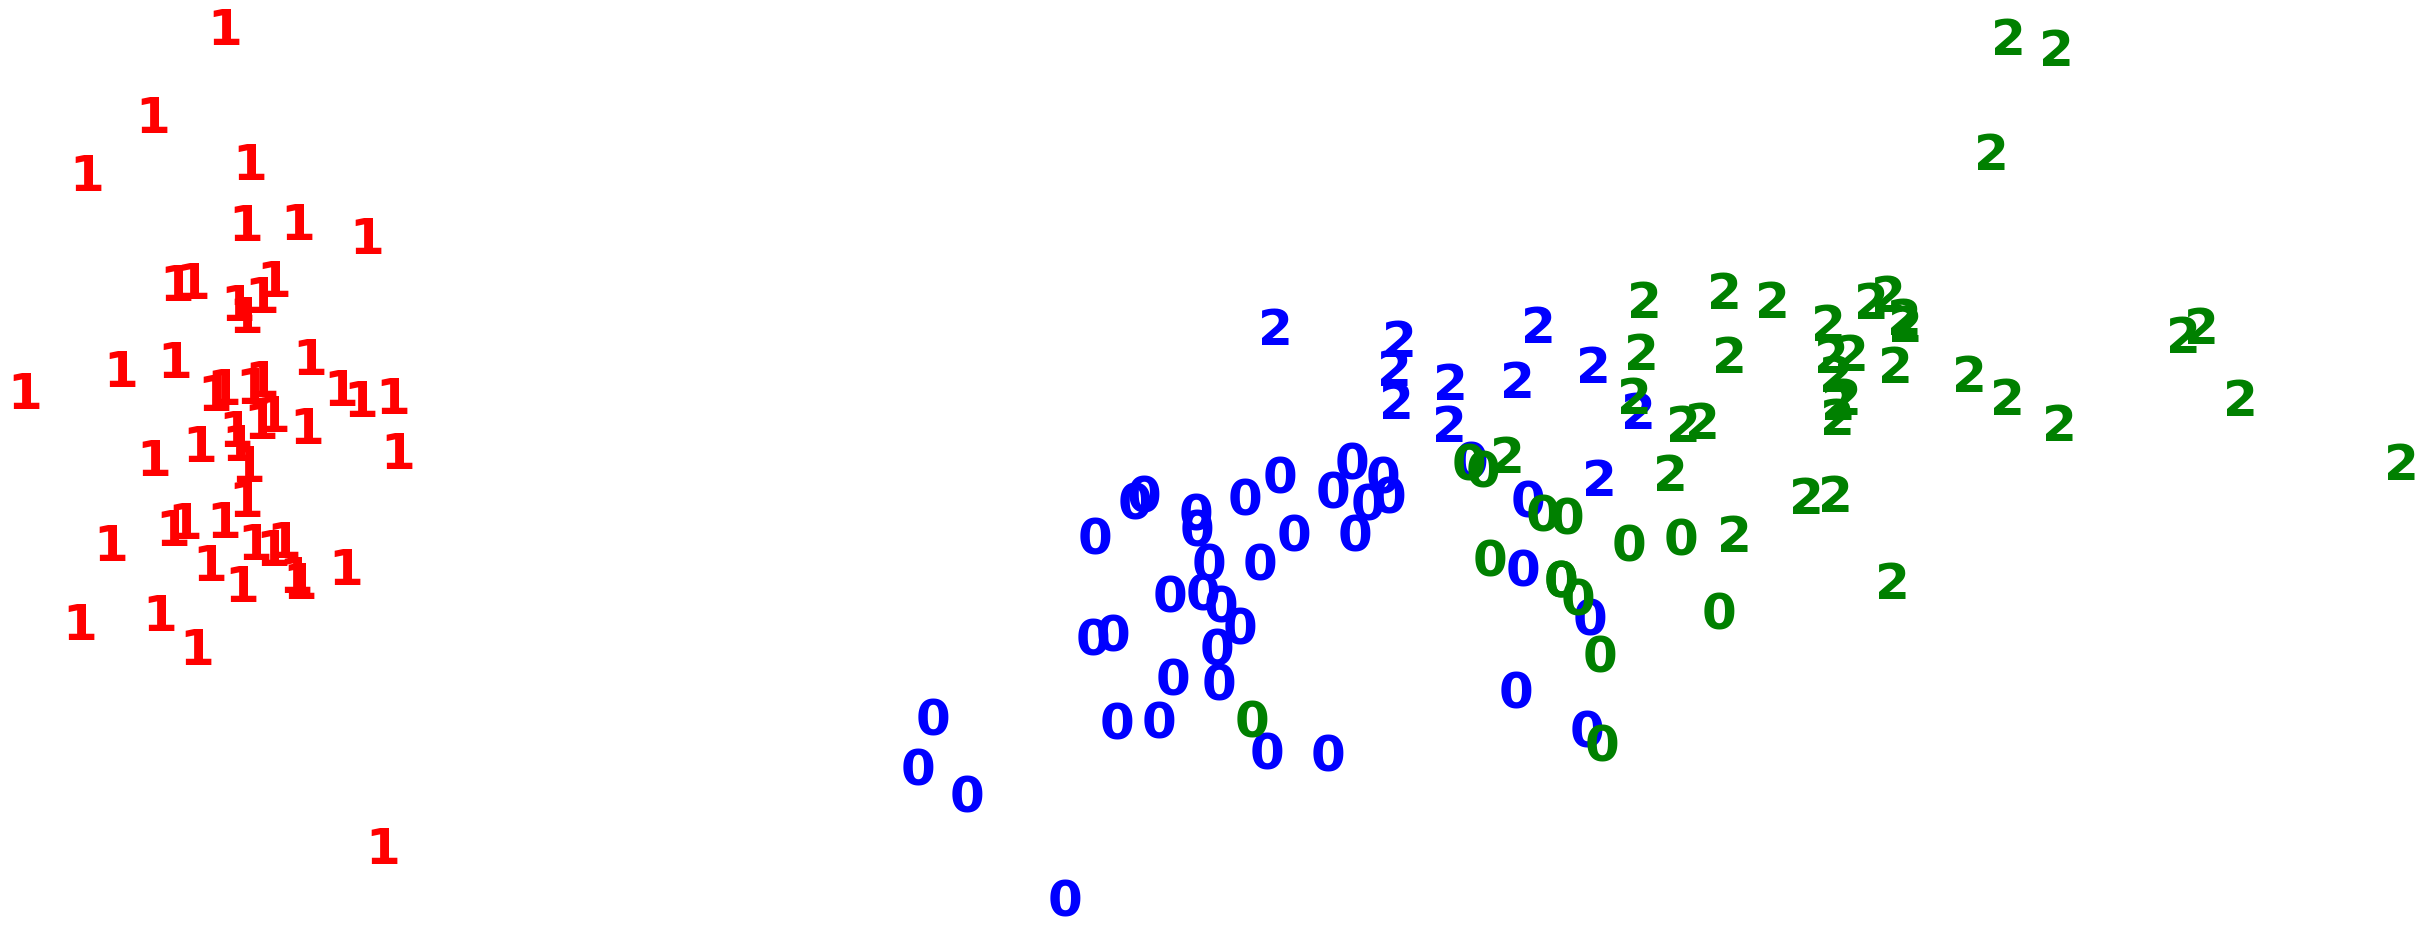

In [70]:
# Defining the k-means
kmeans_cluster = KMeans(n_clusters=3, random_state=123)

# Fit model
%timeit kmeans_cluster.fit(X_std)
y_pred = kmeans_cluster.predict(X_std)


pca = PCA(n_components=2).fit_transform(X_std)

plt.figure(figsize=(7,3))
colours = 'rbg'
for i in range(pca.shape[0]):
    plt.text(pca[i, 0], pca[i, 1], str(y_pred[i]),
             color=colours[y[i]],
             fontdict={'weight': 'bold', 'size': 50}
        )

plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

30.8 ms ± 657 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


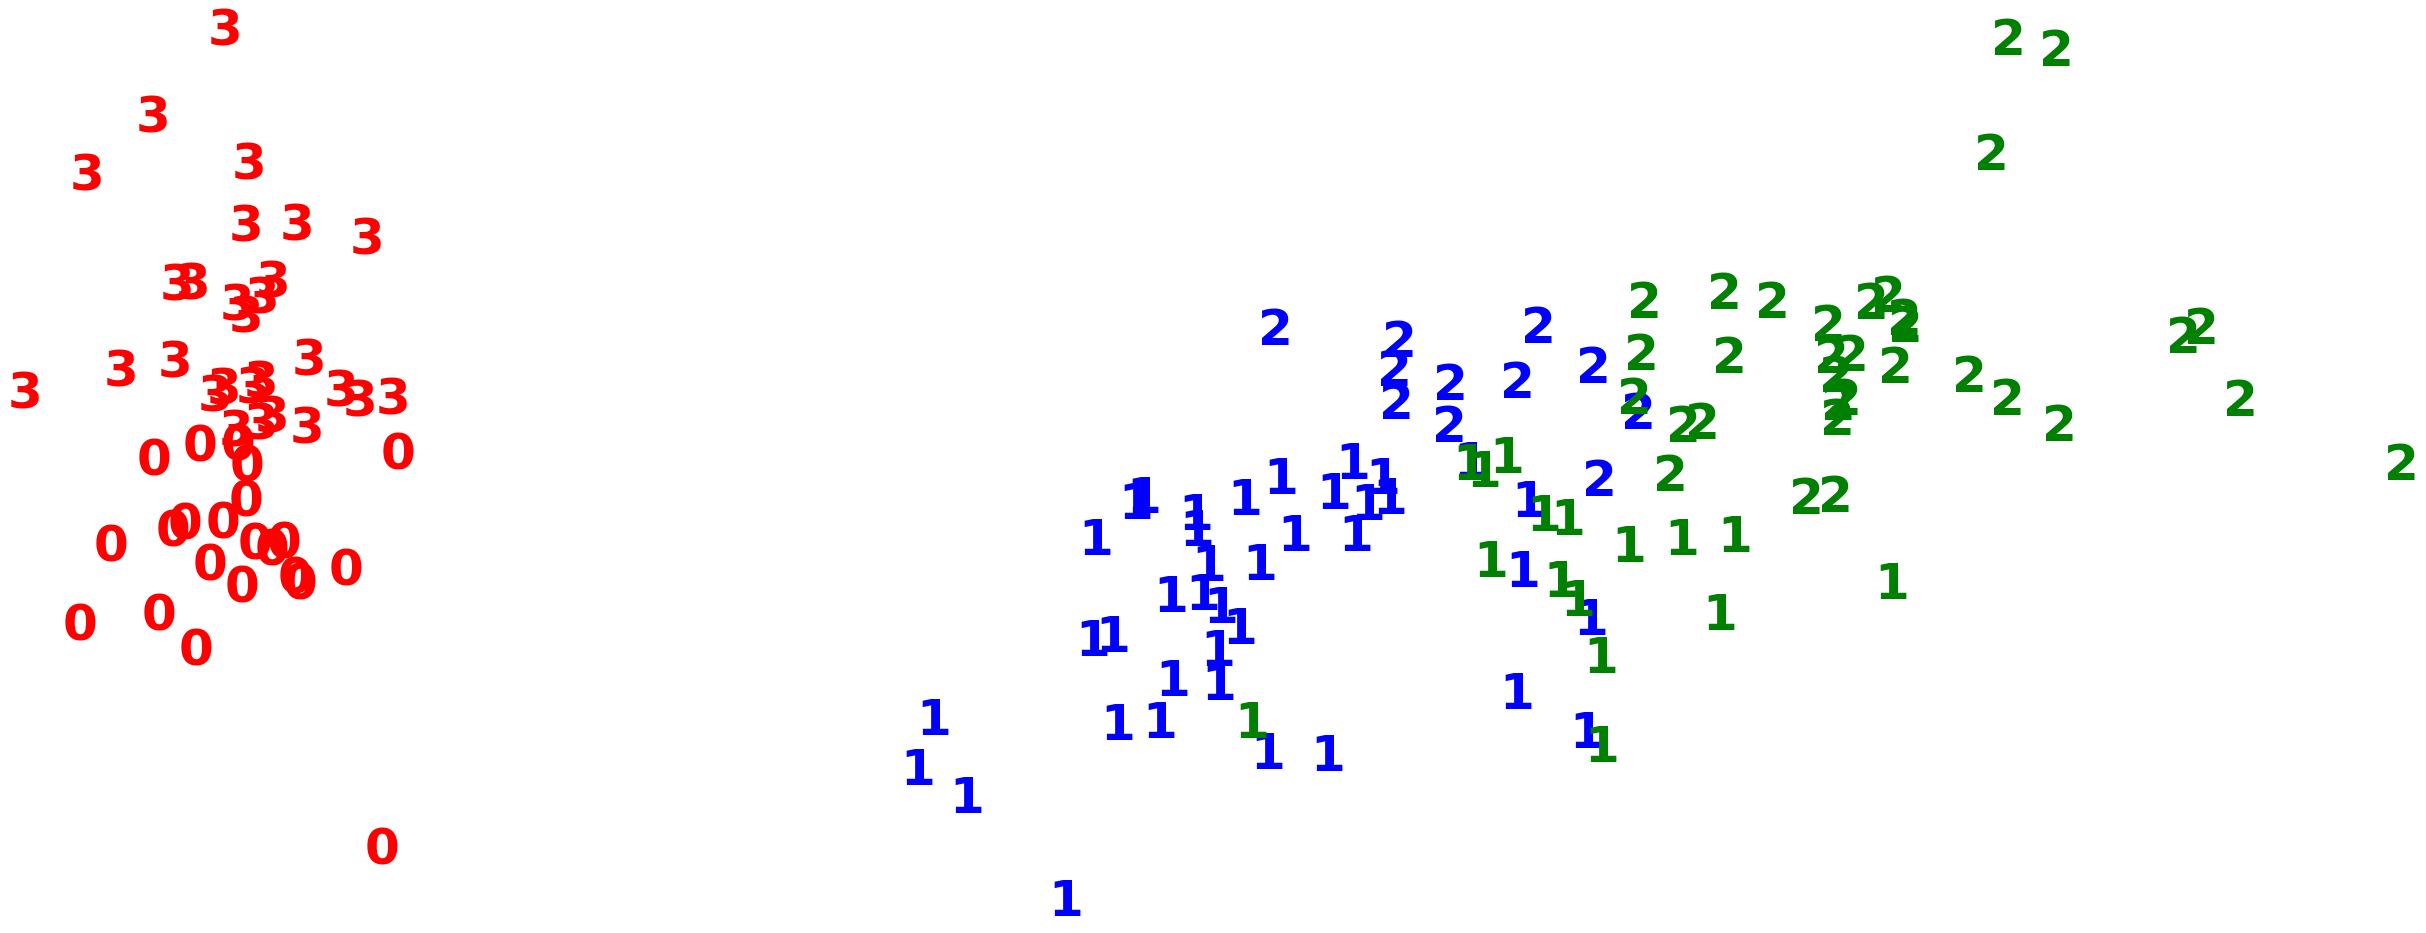

In [68]:
# Defining the k-means
kmeans_cluster = KMeans(n_clusters=4, random_state=123)

# Fit model
%timeit kmeans_cluster.fit(X_std)
y_pred = kmeans_cluster.predict(X_std)


pca = PCA(n_components=2).fit_transform(X_std)

plt.figure(figsize=(7,3))
colours = 'rbgc'
for i in range(pca.shape[0]):
    plt.text(pca[i, 0], pca[i, 1], str(y_pred[i]),
             color=colours[y[i]],
             fontdict={'weight': 'bold', 'size': 50}
        )

plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

36.6 ms ± 809 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


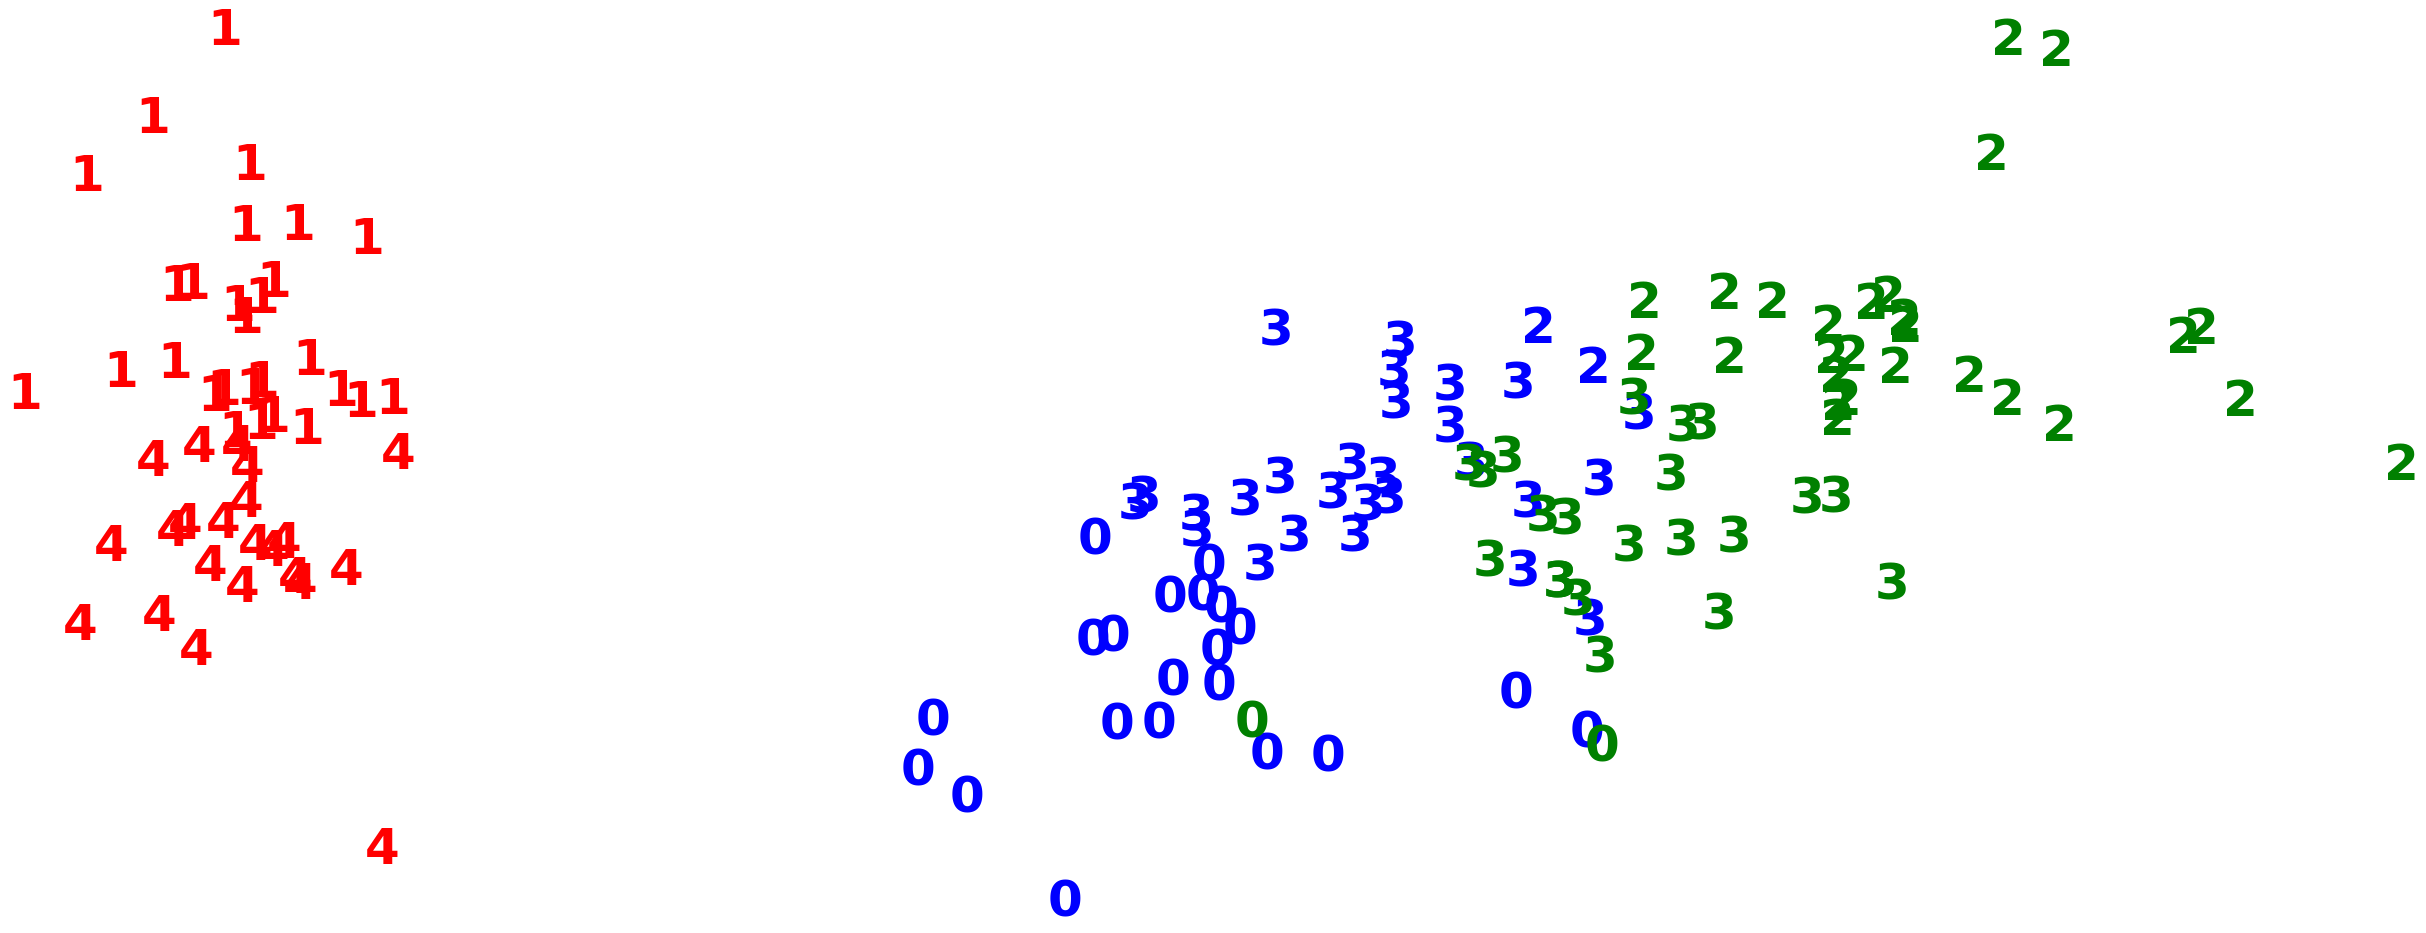

In [69]:
# Defining the k-means
kmeans_cluster = KMeans(n_clusters=5, random_state=123)

# Fit model
%timeit kmeans_cluster.fit(X_std)
y_pred = kmeans_cluster.predict(X_std)


pca = PCA(n_components=2).fit_transform(X_std)

plt.figure(figsize=(7,3))
colours = 'rbgck'
for i in range(pca.shape[0]):
    plt.text(pca[i, 0], pca[i, 1], str(y_pred[i]),
             color=colours[y[i]],
             fontdict={'weight': 'bold', 'size': 50}
        )

plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

# 2

In [20]:
postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'heartdisease'
engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))

df = pd.read_sql_query('select * from heartdisease',con=engine)

# No need for an open connection, 
# because you're only doing a single query
engine.dispose()

In [21]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
0     303 non-null float64
1     303 non-null float64
2     303 non-null float64
3     303 non-null float64
4     303 non-null float64
5     303 non-null float64
6     303 non-null float64
7     303 non-null float64
8     303 non-null float64
9     303 non-null float64
10    303 non-null float64
11    303 non-null object
12    303 non-null object
13    303 non-null int64
dtypes: float64(11), int64(1), object(2)
memory usage: 33.3+ KB


In [27]:
df['11'].unique()

array(['0.0', '3.0', '2.0', '1.0', 0.0], dtype=object)

In [28]:
df['12'].unique()

array(['6.0', '3.0', '7.0', 0.0], dtype=object)

In [25]:
df=df.replace('?',0.0)

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
0     303 non-null float64
1     303 non-null float64
2     303 non-null float64
3     303 non-null float64
4     303 non-null float64
5     303 non-null float64
6     303 non-null float64
7     303 non-null float64
8     303 non-null float64
9     303 non-null float64
10    303 non-null float64
11    303 non-null object
12    303 non-null object
13    303 non-null int64
dtypes: float64(11), int64(1), object(2)
memory usage: 33.3+ KB


In [48]:
X=df.iloc[:,:13]
y=df.iloc[:,13]

In [49]:
y.unique()

array([0, 2, 1, 3, 4])

In [50]:
y=np.where(y>0,1,0)

In [51]:
scaler=StandardScaler()
X_std=scaler.fit_transform(X)

In [52]:

kmeans=KMeans(n_clusters=2,random_state=1)
kmeans.fit(X_std)
y_pred = kmeans.predict(X_std)

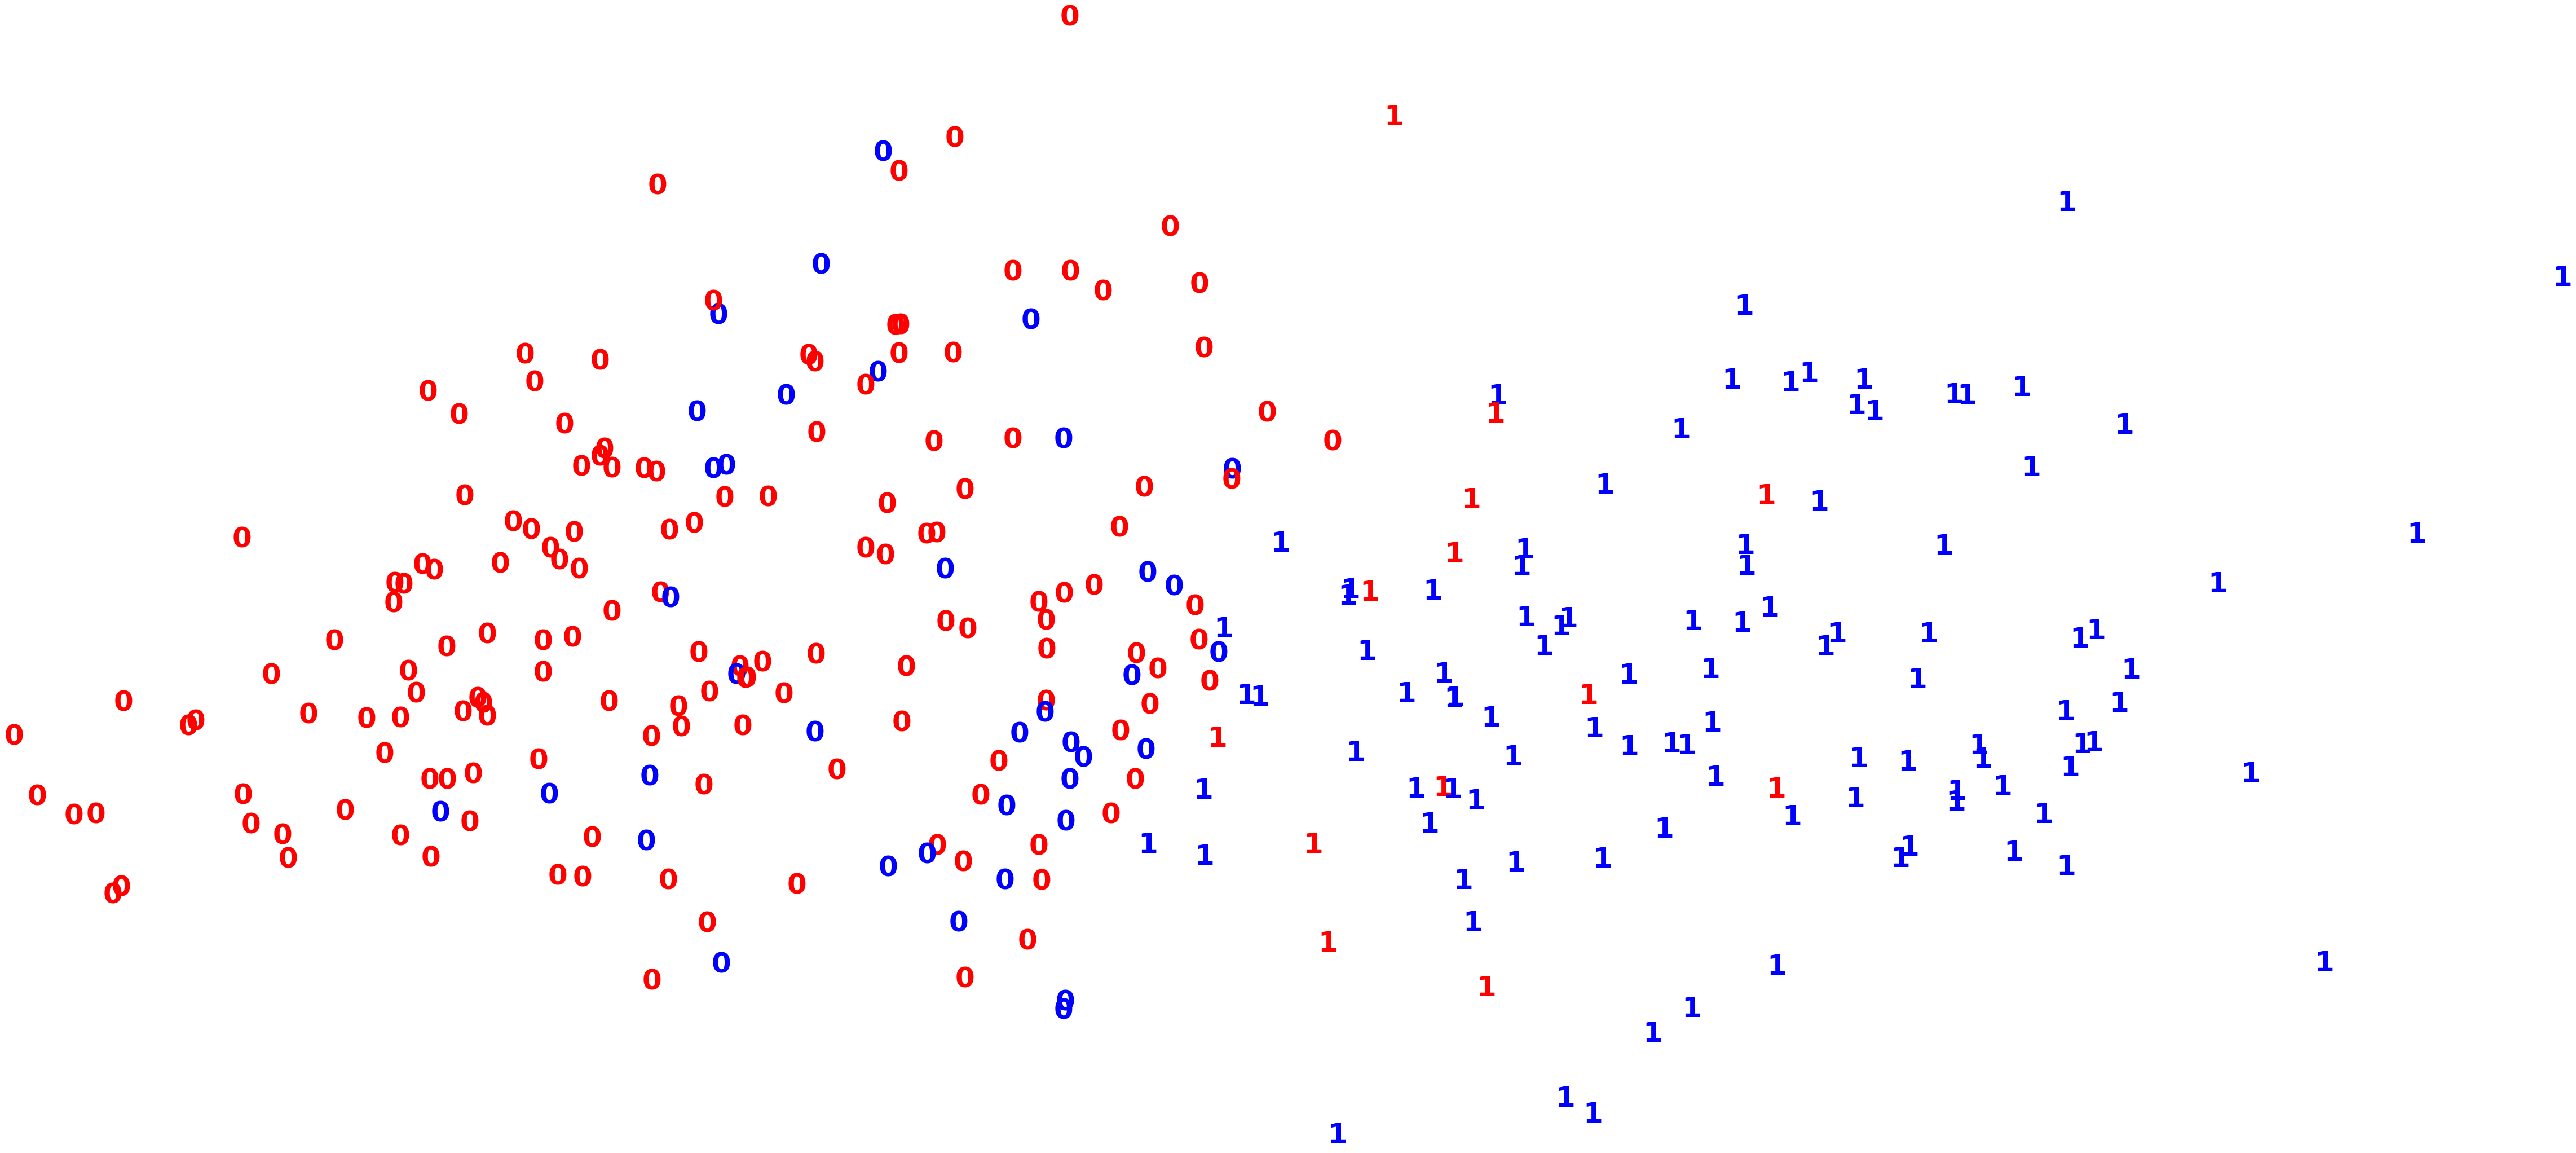

In [54]:
pca = PCA(n_components=2).fit_transform(X_std)

plt.figure(figsize=(10,5))
colours = 'rb'
for i in range(pca.shape[0]):
    plt.text(pca[i, 0], pca[i, 1], str(y_pred[i]),
             color=colours[y[i]],
             fontdict={'weight': 'bold', 'size': 50}
        )

plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

It is not perfect!

In [55]:
pca.shape[0]

303

In [56]:
pca

array([[ 1.1612725 ,  0.93859451],
       [ 3.23776804,  1.42393699],
       [ 3.14004413, -0.64911402],
       [-0.45310108, -1.43013311],
       [-2.25794415,  0.38617393],
       [-2.19109012, -0.32936344],
       [ 1.99028045,  1.71875584],
       [-0.69456921,  0.90704517],
       [ 1.39307299, -0.02065171],
       [ 2.70478809, -0.96535506],
       [ 0.01637236, -1.1183412 ],
       [-0.65711115,  1.88536999],
       [ 1.44737108,  0.10899616],
       [-2.02055412, -1.16965475],
       [-0.5069331 ,  0.13633041],
       [-1.35722241, -0.4178115 ],
       [-0.46699512, -1.82517967],
       [-1.02192845, -0.33227395],
       [-1.76387355,  0.61399026],
       [-2.21516111, -0.18760151],
       [ 0.1401015 , -0.40322767],
       [-1.42368111,  2.98645837],
       [-0.51048592,  0.4802736 ],
       [ 0.83097186, -0.05214781],
       [ 2.85038475, -0.93456034],
       [-1.16173271, -0.15610247],
       [-2.05377045,  1.48940246],
       [ 0.72101404,  1.31347007],
       [-1.34805962,